# Ver la history del pickle

A partri de encontrar el archivo pickle se necesitan funciones que analicen las claves disponibles de la history y muestren el output.

Claves disponibles en history: dict_keys(['loss'])


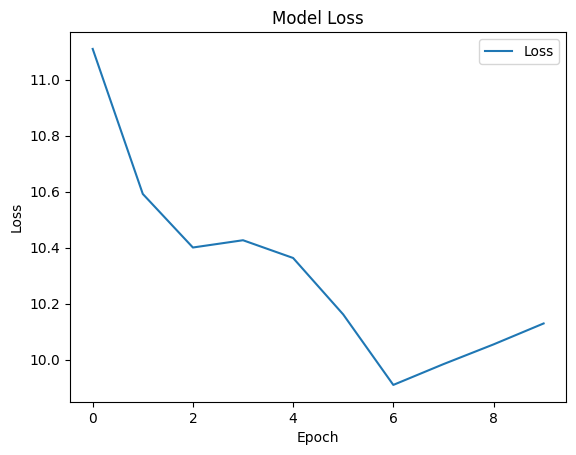

In [2]:
import pickle
import matplotlib.pyplot as plt

# Ruta al archivo history.pkl
history_path = './0812/history.pkl'

# Cargar la historia desde el archivo pickle
with open(history_path, 'rb') as file:
    history = pickle.load(file)

# Verificar las claves disponibles en history
print("Claves disponibles en history:", history.keys())

# Graficar el historial de pérdida
plt.plot(history['loss'], label='Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


Ver resultados del dataset

'..\\final'

In [17]:
import matplotlib.pyplot as plt
from grav_lens import load_tf_dataset
import os

parent_data = os.path.join("..","final")

# si se
dataset = load_tf_dataset(data_index='1', max_files=100, home=parent_data)

for X, Y in dataset.take(1):  # Solo mostrar los primeros 5 elementos
    print("X:", X.shape)
    print("Y:", Y.shape)
    print("Los datos se encuentran correctamente conectados")

Using data folder: ..\final\data\1
X: (3, 128, 128)
Y: (128, 128)
Los datos se encuentran correctamente conectados


In [18]:


# Definir una pérdida personalizada que combine MAE y KL Divergence
def combined_loss(y_true, y_pred):
    mae_loss = tf.keras.losses.mae(y_true, y_pred)  # Usar la función abreviada mae()
    kl_loss = tf.keras.losses.kld(y_true, y_pred)   # Usar la función abreviada kld()
    return mae_loss + kl_loss  # Puedes ponderar las pérdidas si es necesario

# # Compilar el modelo con la pérdida combinada
# model.compile(optimizer='adam', loss=combined_loss)

# Función para preparar el dataset con batching y shuffling
def prepare_dataset(dataset, batch_size=32):
    dataset = dataset.shuffle(buffer_size=1000)  # Shuffling para mezclar los datos
    dataset = dataset.batch(batch_size)  # Aplicar batching
    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)  # Prefetch para optimización
    return dataset

# Preparar el dataset
batch_size = 32
prepared_dataset = prepare_dataset(dataset, batch_size)


# Mision:
Cargar en lugar de un pickle del modelo, los pesos de este

In [19]:
import tensorflow as tf

# Ruta al archivo history.pkl
model_path = './0812/model_1.pkl'

# Cargar la historia desde el archivo pickle
with open(model_path, 'rb') as file:
    model = pickle.load(file)



TypeError: Could not locate function 'combined_loss'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'builtins', 'class_name': 'function', 'config': 'combined_loss', 'registered_name': 'function'}

In [ ]:
dir(model)